<a href="https://colab.research.google.com/github/JJUYAAA/lecture_AI/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%ED%83%90%EC%83%89%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. 탐색 종류

|     | 맹목적 탐색 | open 자료구조 | 구현 |
|-----|-------------|-------------|---|
| 임의 경로 탐색 | 깊이 우선 탐색 |  스택 | list |
| 임의 경로 탐색 | 너비 우선 탐색 |  큐 | deque |
| 최적 경로 탐색 | 균일 비용 탐색 | 우선순위 큐 | heapq |

## 2. 깊이 우선 탐색 (DFS)

### 2.1 스택 자료구조

선입 후출, 후입 선출

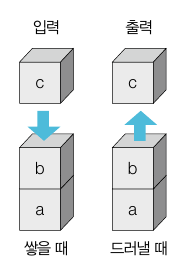

In [5]:
# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()

stack = []
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
print(stack)

stack.pop()
print(stack)

stack.append(1)
stack.append(4)
print(stack)

stack.pop()
print(stack)

[5, 2, 3, 7]
[5, 2, 3]
[5, 2, 3, 1, 4]
[5, 2, 3, 1]


### 2.2 깊이 우선 탐색 구현

1. 탐색 시작 노드를 스택에 삽입한다.
2. 스택의 최상단 노드가 방문하지 않은 노드면 꺼내 방문처리 한다. 최상단 노드의 방문하지 않은 인접 노드가 있으면 그 인접 노드를 스택에 넣는다.
3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복한다.

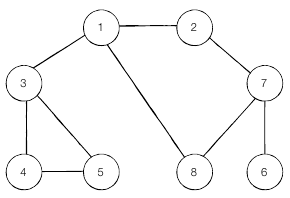

stack = [], visited = [] \
stack = [1], cisited = [] \
stack = [8,3,2], visited = [1] \
stack = [8,3,7], visited = [1,2] \
stack = [8,3,8,6], visited = [1,2,7] \
stack = [8,3,8], visited = [1,2,7,6] \
stack = [8,3], visited = [1,2,7,6,8] \
stack = [8,5,4], visited = [1,2,7,6,8,3] \ 1은 방문 햇으니까 4,5만-> 큰거 먼저 쌓고 작은거
stack = [8,5,5], visited = [1,2,7,6,8,3,4] \ 5가 있어도, 방문하지 않았으니까 쌓아야함
stack = [8,5], visited = [1,2,7,6,8,3,4,5] \
stack = [8], visited = [1,2,7,6,8,3,4,5] \
stack = [], visited = [1,2,7,6,8,3,4,5] \

In [20]:
#인접한 노드들을 리스트로 저장
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]


#print(graph[1])

n = len(graph)
visited = [False] * n
print(visited)

def dfs1(graph, start, visited):
    stack = [start] #1

    while stack: #스택에 값이 없을 때까지
      print(stack)
      v = stack.pop()
      if not visited[v]:
        visited[v] = True
        print(v, end=' ')
        for i in graph[v][::-1]:
          if not visited[i]:
            stack.append(i)
dfs1(graph, 1, visited)
#예상한 결과와 다름
#추가될 때, 2,3,8 순으로 추가됨 (반복문때문)
# for i in graph[v]에서 [v][::-1]로 바꾸기

[False, False, False, False, False, False, False, False, False]
[1]
1 [8, 3, 2]
2 [8, 3, 7]
7 [8, 3, 8, 6]
6 [8, 3, 8]
8 [8, 3]
3 [8, 5, 4]
4 [8, 5, 5]
5 [8, 5]
[8]


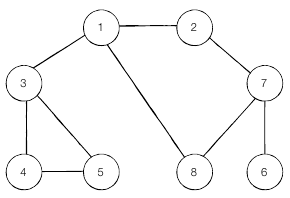

- dfs(1)
  - dfs(2)
    - dfs(7)
      - dfs(6)
      - dfs(8)
  - dfs(3)
    - dfs(4)
      - dfs(5)
    - dfs(5)
  - dfs(8)


In [11]:
visited = [False] * n
def dfs2(graph, start, visited):
  visited[start] = True
  print(start, end=' ')

  for i in graph[start]:
    if not visited[i]:
      visited[i] = True
      print(i, end=' ')

      for j in graph[i]:
        if not visited[j]:
          visited[j] = True
          print(j, end= ' ')


          for k in graph[j]:
            if not visited[k]:
              visited[k] = True
              print(k, end= ' ')
dfs2(graph, 1, visited)

1 2 7 6 8 3 4 5 

In [13]:
#재귀함수 사용
visited = [False] *n
def dfs(graph, v, visited):
  visited[v] = True
  print(v, end=' ')

  for i in graph[v]:
    if not visited[i]:
      dfs(graph, i , visited)
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

## 3. 너비 우선 탐색 (BFS)

### 3.1 큐 자료구조
선입 선출

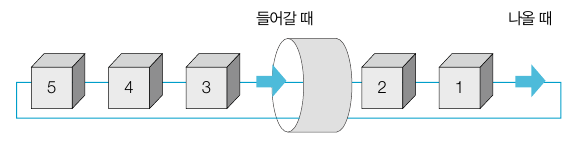

In [17]:
# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()

#[1,2,3,4,5,6]
# 1 제거하면 인덱스가 달라짐 -> 시간복잡도: O(n) -> 오래 걸림

from collections import deque

queue = deque()
print(type(queue))

queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
print(queue)

queue.popleft()
print(queue)

queue.append(1)
queue.append(4)
print(queue)

queue.popleft()
print(queue)

<class 'collections.deque'>
deque([5, 2, 3, 7])
deque([2, 3, 7])
deque([2, 3, 7, 1, 4])
deque([3, 7, 1, 4])


### 3.2 너비 우선 탐색 구현

1. 탐색 시작 노드를 큐에 삽입하고 방문 처리를 한다.
2. 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문처리 한다.
3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복한다.

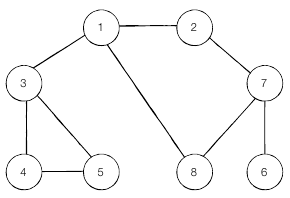

In [19]:
visited = [False]*n

def bfs(graph, start, visited):
  queue = deque([start])
  visited[start] = True

  while queue: #queue 안에 모든 값이 없어질 때까지
    print(queue)
    v = queue.popleft()
    print(v, end=' ')
    for i in graph[v]: #v와 인접한 모든 i 노드 중에서
      if not visited[i]:
        queue.append(i)
        visited[i] = True

bfs(graph, 1, visited)

deque([1])
1 deque([2, 3, 8])
2 deque([3, 8, 7])
3 deque([8, 7, 4, 5])
8 deque([7, 4, 5])
7 deque([4, 5, 6])
4 deque([5, 6])
5 deque([6])
6 

## 4. 균일 비용 탐색 (dijkstra)

### 4.1 heapq 자료구조

삽입 삭제 시간 복잡도, O(logn)

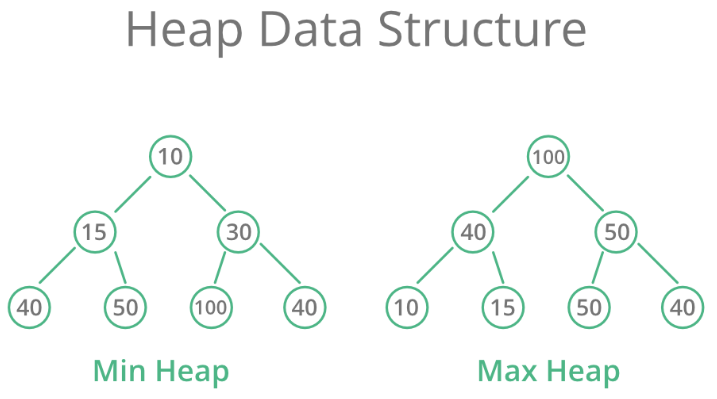

노드 삽입

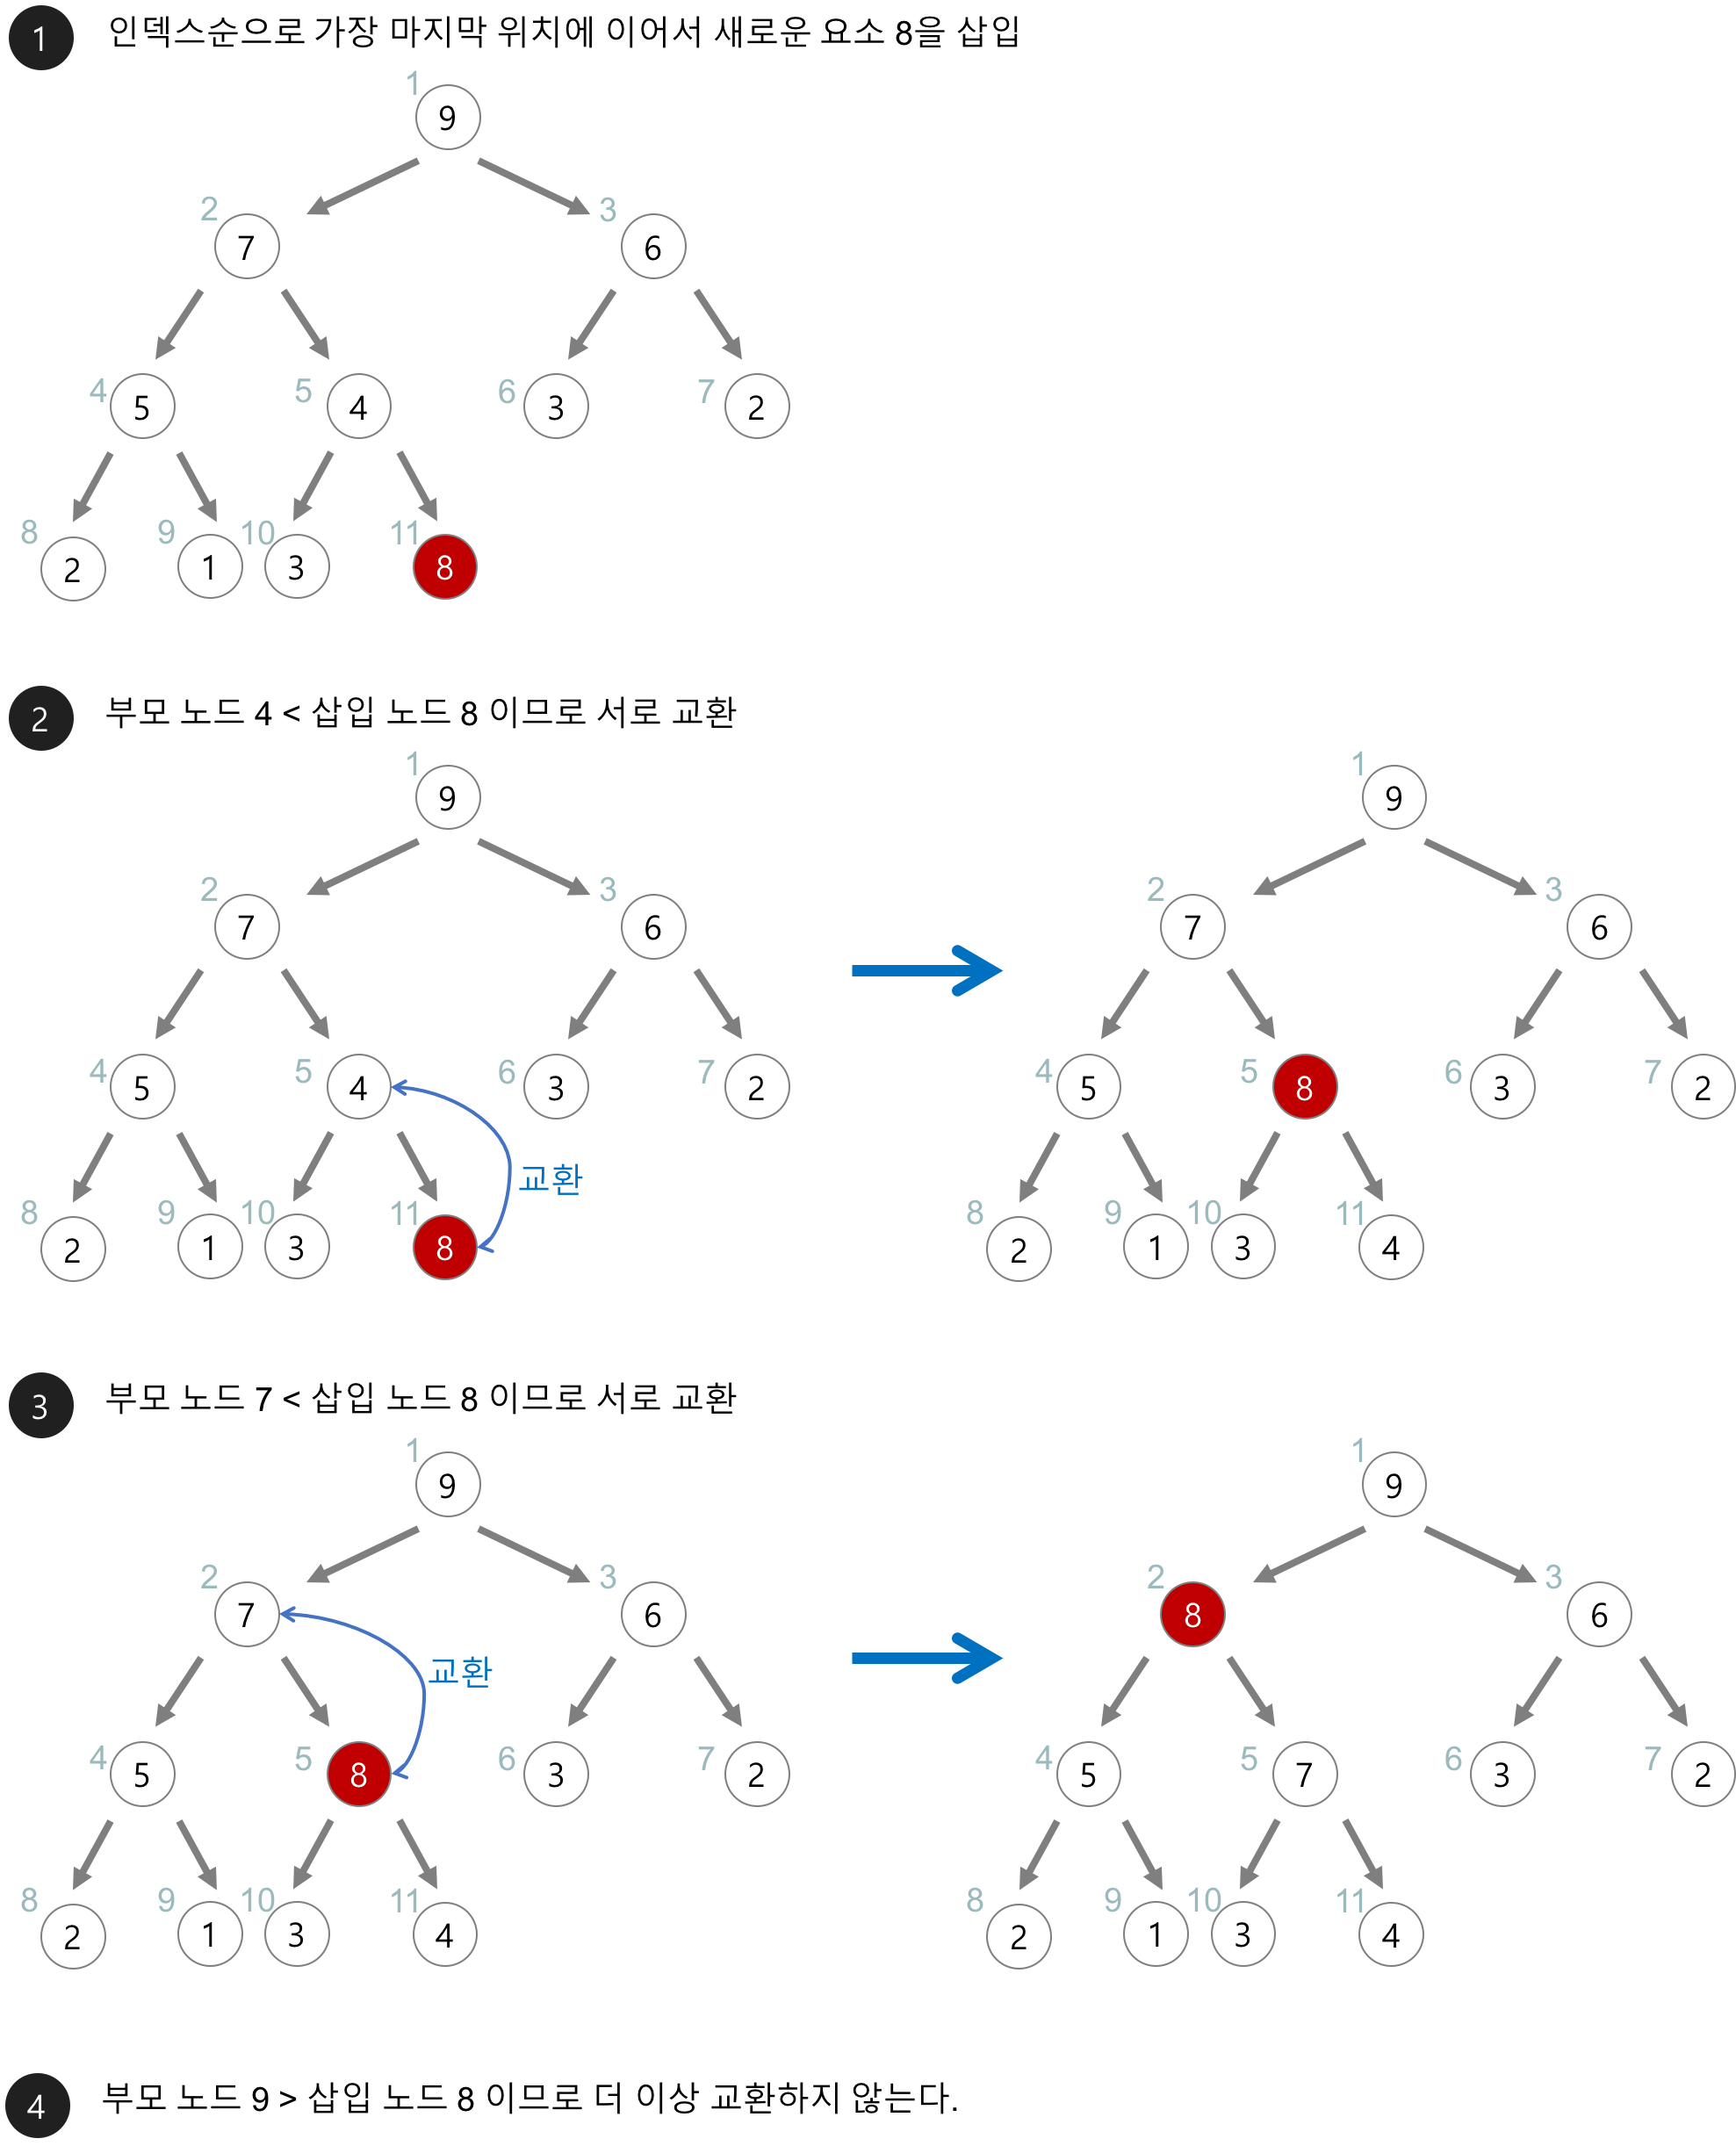

노드 삭제
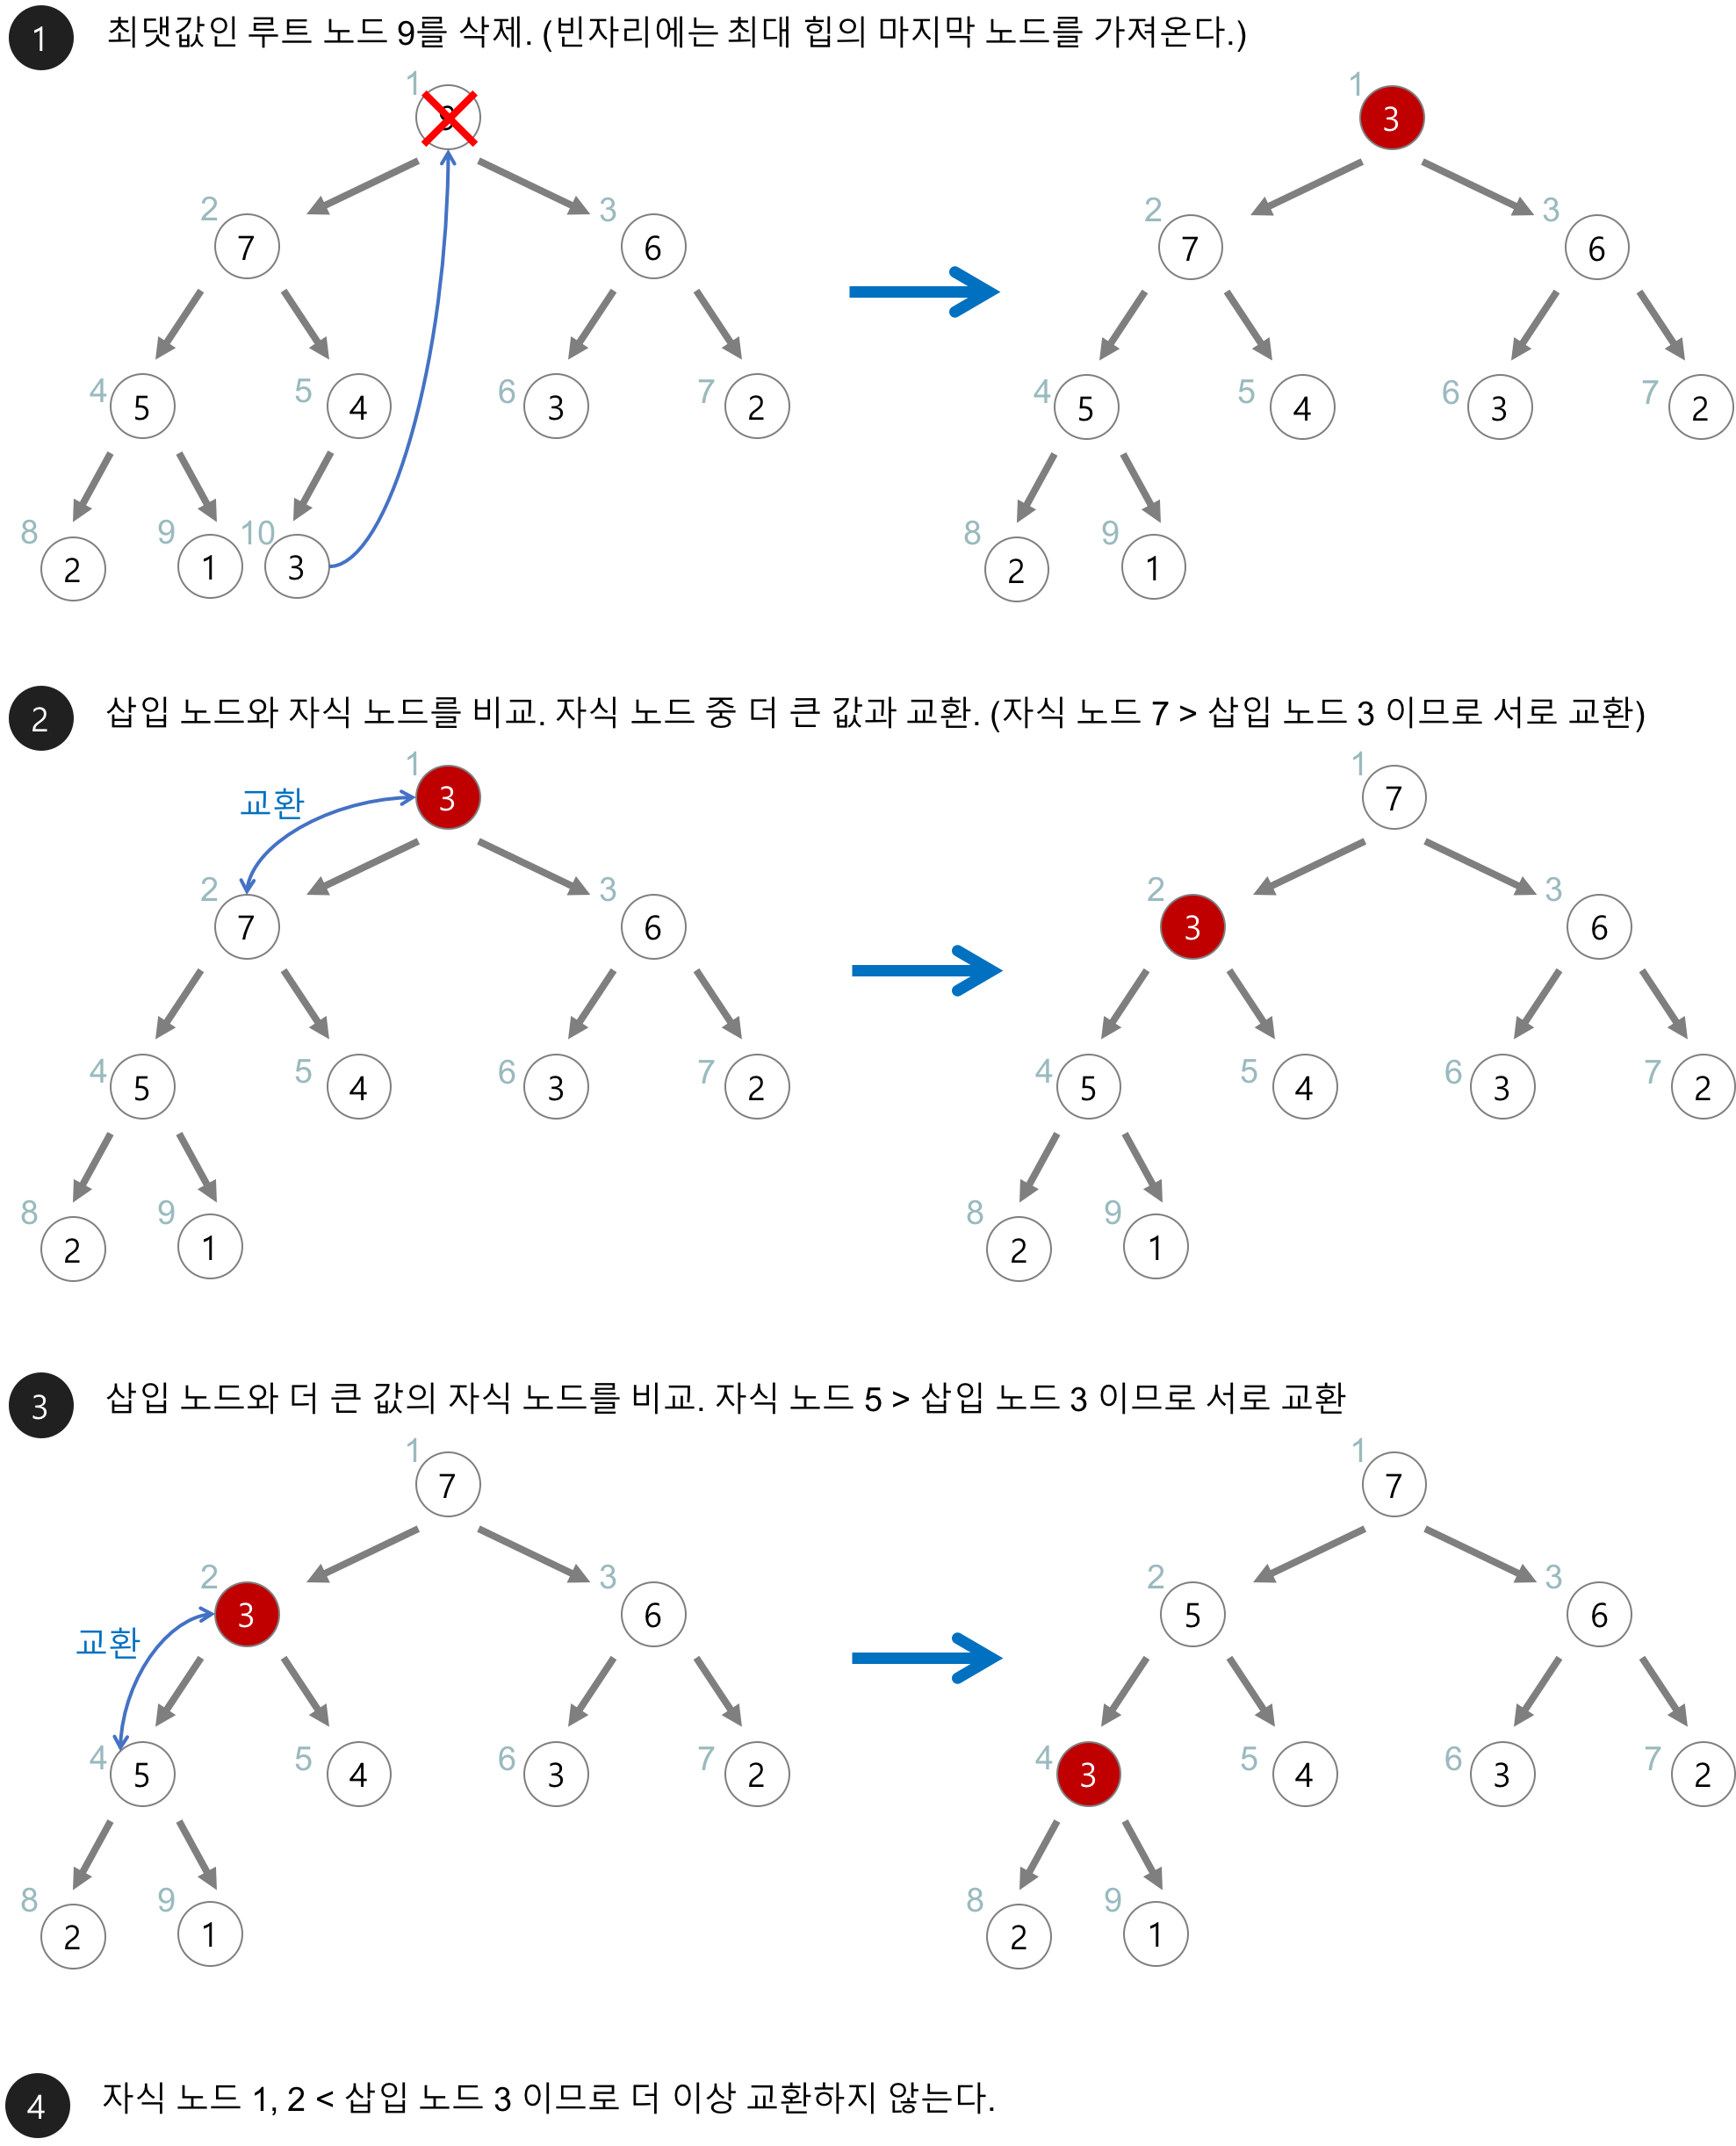

시간 복잡도 = log(N)

In [21]:
# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
import heapq
#최소 힙
queue = []
heapq.heappush(queue,5)
heapq.heappush(queue,2)
heapq.heappush(queue,3)
heapq.heappush(queue,7)
print(heapq.heappop(queue))#가장 작은 숫자 출력

2


In [33]:
queue = []
heapq.heappush(queue, (-5, 5))
heapq.heappush(queue, (-2, 2))
heapq.heappush(queue, (-3, 3))
heapq.heappush(queue, (-7, 7))
print(heapq.heappop(queue)[1])

7


### 4.2 균일 비용 탐색 구현

1. 출발 노드를 설정한다.
2. 최단 거리 테이블을 초기화한다.
3. 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택한다.
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신한다.
5. 위 과정에서 3, 4번을 반복한다.

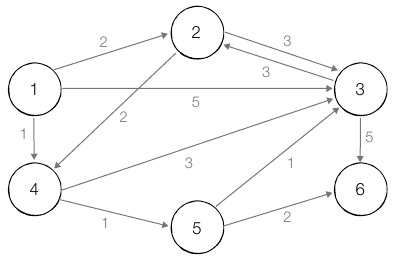

In [27]:
graph = [
    [],
    [[2,2], [3,5], [4,1]], #노드, 그 노드와 거리
    [[3,3] , [4,2]],
    [[2,3], [4,2]],
    [[2,3], [6,5]],
    [[3,3], [5,1]],
    [[3,1], [6,2]],
    []
]

n = len(graph)
distance = [1e9] * n
start = 1

def djikstra(start):
    distance[start] = 0
    queue = []
    heapq.heappush(queue, (0, start))

    while queue:
        dist, now = heapq.heappop(queue)

        if distance[now] < dist:
            continue
        for i in graph[now]:
            cost = dist + i[1]
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(queue, (cost, i[0]))

djikstra(start)
print(distance)

[1000000000.0, 0, 2, 5, 1, 1000000000.0, 6, 1000000000.0]


## 정리

- 스택

| | 삽입 | 삭제 |
|-|-|-|
|list| O(1) | O(1) |
|deque| O(1) | O(1) |

- 큐

| | 삽입 | 삭제 |
|-|-|-|
|list| O(1) | O(n) |
|deque| O(1) | O(1) |

- 우선순위 큐

| | 삽입 | 삭제 |
|-|-|-|
|list| O(n) | O(n) |
|heapq| O(logn) | O(logn) |

## 연습
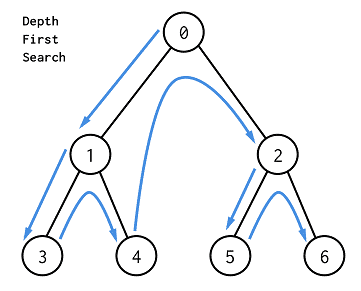
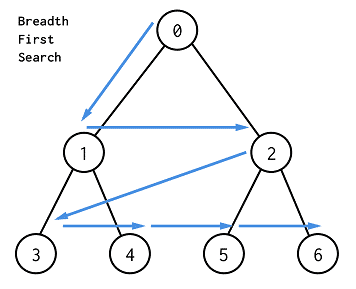

In [29]:
graph = [
    [1,2],
    [0,3,4],
    [0,5,6],
    [1],
    [1],
    [2],
    [2]
]

In [28]:
n = len(graph)
visited = [False] * n
dfs(graph, 0, visited)
#엥 0134256 나와야 하는데

0 